In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

In [2]:
df = pd.read_csv("cars.csv")
df.head()

,symboling,normalized-losses,make,fuel-type,body-style,drive-wheels,engine-location,width,height,engine-type,engine-size,horsepower,city-mpg,highway-mpg,price
0,3,?,alfa-romero,gas,convertible,rwd,front,64.1,48.8,dohc,130,111,21,27,13495
1,3,?,alfa-romero,gas,convertible,rwd,front,64.1,48.8,dohc,130,111,21,27,16500
2,1,?,alfa-romero,gas,hatchback,rwd,front,65.5,52.4,ohcv,152,154,19,26,16500
3,2,164,audi,gas,sedan,fwd,front,66.2,54.3,ohc,109,102,24,30,13950
4,2,164,audi,gas,sedan,4wd,front,66.4,54.3,ohc,136,115,18,22,17450


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   symboling          205 non-null    int64  
 1   normalized-losses  205 non-null    object 
 2   make               205 non-null    object 
 3   fuel-type          205 non-null    object 
 4   body-style         205 non-null    object 
 5   drive-wheels       205 non-null    object 
 6   engine-location    205 non-null    object 
 7   width              205 non-null    float64
 8   height             205 non-null    float64
 9   engine-type        205 non-null    object 
 10  engine-size        205 non-null    int64  
 11  horsepower         205 non-null    object 
 12  city-mpg           205 non-null    int64  
 13  highway-mpg        205 non-null    int64  
 14  price              205 non-null    int64  
dtypes: float64(2), int64(5), object(8)
memory usage: 24.1+ KB


In [4]:
df.isna().sum()

symboling            0
normalized-losses    0
make                 0
fuel-type            0
body-style           0
drive-wheels         0
engine-location      0
width                0
height               0
engine-type          0
engine-size          0
horsepower           0
city-mpg             0
highway-mpg          0
price                0
dtype: int64

In [5]:
df["normalized-losses"].value_counts()

?      41
161    11
91      8
150     7
128     6
104     6
134     6
65      5
103     5
94      5
74      5
168     5
102     5
95      5
85      5
118     4
122     4
93      4
106     4
148     4
125     3
154     3
83      3
101     3
137     3
115     3
164     2
153     2
129     2
81      2
145     2
194     2
192     2
188     2
89      2
108     2
87      2
197     2
110     2
158     2
113     2
119     2
256     1
77      1
231     1
107     1
121     1
90      1
98      1
78      1
142     1
186     1
Name: normalized-losses, dtype: int64

In [6]:
df["horsepower"].value_counts()

68     19
70     11
69     10
116     9
110     8
95      7
101     6
62      6
114     6
88      6
160     6
102     5
97      5
145     5
82      5
84      5
76      5
111     4
123     4
92      4
86      4
121     3
90      3
182     3
85      3
152     3
207     3
73      3
155     2
161     2
162     2
176     2
56      2
?       2
94      2
156     2
112     2
52      2
100     2
184     2
60      1
262     1
106     1
143     1
120     1
134     1
72      1
55      1
48      1
58      1
115     1
78      1
154     1
64      1
135     1
140     1
142     1
175     1
288     1
200     1
Name: horsepower, dtype: int64

In [7]:
#replacing the missing values with (np.nan)
df["normalized-losses"].replace("?", np.nan, inplace=True)
df["horsepower"].replace("?", np.nan, inplace=True)

#changing the datatype
df["normalized-losses"] = df["normalized-losses"].astype("float")
df["horsepower"] = df["horsepower"].astype("float")

#get Mean
nlmean = df["normalized-losses"].mean()
hpmean = df["horsepower"].mean()

#using Fillna
df["normalized-losses"].fillna(nlmean, inplace=True)
df["horsepower"].fillna(hpmean, inplace=True)


In [8]:
df["normalized-losses"].value_counts

<bound method IndexOpsMixin.value_counts of 0      122.0
1      122.0
2      122.0
3      164.0
4      164.0
       ...  
200     95.0
201     95.0
202     95.0
203     95.0
204     95.0
Name: normalized-losses, Length: 205, dtype: float64>

In [9]:
df["horsepower"].value_counts

<bound method IndexOpsMixin.value_counts of 0      111.0
1      111.0
2      154.0
3      102.0
4      115.0
       ...  
200    114.0
201    160.0
202    134.0
203    106.0
204    114.0
Name: horsepower, Length: 205, dtype: float64>

# Clearing all the OutLiers

In [10]:
#searching for all the outliers that are present in the dataset 

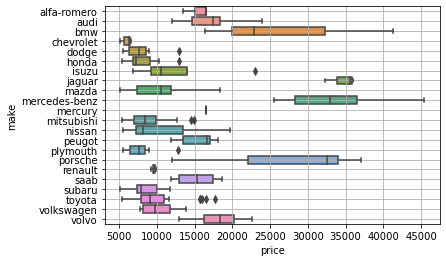

In [11]:
sns.boxplot(data=df, x="price", y="make")
plt.grid(True)

In [12]:
#selecting the particular data which has outliers present in them

In [13]:
df[(df["make"]=="dodge") & (df["price"]>11000)]

,symboling,normalized-losses,make,fuel-type,body-style,drive-wheels,engine-location,width,height,engine-type,engine-size,horsepower,city-mpg,highway-mpg,price
29,3,145.0,dodge,gas,hatchback,fwd,front,66.3,50.2,ohc,156,145.0,19,24,12964


In [14]:
#dropping the outliers using drop function

In [15]:
df.drop(29, inplace=True) 

In [16]:
df[(df["make"]=="honda") & (df["price"]>11000)]

,symboling,normalized-losses,make,fuel-type,body-style,drive-wheels,engine-location,width,height,engine-type,engine-size,horsepower,city-mpg,highway-mpg,price
41,0,85.0,honda,gas,sedan,fwd,front,65.2,54.1,ohc,110,101.0,24,28,12945


In [17]:
df.drop(41, inplace=True)

In [18]:
df[(df["make"]=="isuzu") & (df["price"]>20000)]

,symboling,normalized-losses,make,fuel-type,body-style,drive-wheels,engine-location,width,height,engine-type,engine-size,horsepower,city-mpg,highway-mpg,price
45,0,122.0,isuzu,gas,sedan,fwd,front,63.6,52.0,ohc,90,70.0,38,43,23000


In [19]:
df.drop(45, inplace=True)

In [20]:
df[(df["make"]=="mitsubishi") & (df["price"]>13000)]

,symboling,normalized-losses,make,fuel-type,body-style,drive-wheels,engine-location,width,height,engine-type,engine-size,horsepower,city-mpg,highway-mpg,price
83,3,122.0,mitsubishi,gas,hatchback,fwd,front,66.3,50.2,ohc,156,145.0,19,24,14869
84,3,122.0,mitsubishi,gas,hatchback,fwd,front,66.3,50.2,ohc,156,145.0,19,24,14489


In [21]:
df.drop([83,84], inplace=True)

In [22]:
df[(df["make"]=="plymouth") & (df["price"]>10000)]

,symboling,normalized-losses,make,fuel-type,body-style,drive-wheels,engine-location,width,height,engine-type,engine-size,horsepower,city-mpg,highway-mpg,price
124,3,122.0,plymouth,gas,hatchback,rwd,front,66.3,50.2,ohc,156,145.0,19,24,12764


In [23]:
df.drop(124, inplace=True)

In [24]:
df[(df["make"]=="toyota") & (df["price"]>12000)]

,symboling,normalized-losses,make,fuel-type,body-style,drive-wheels,engine-location,width,height,engine-type,engine-size,horsepower,city-mpg,highway-mpg,price
172,2,134.0,toyota,gas,convertible,rwd,front,65.6,53.0,ohc,146,116.0,24,30,17669
178,3,197.0,toyota,gas,hatchback,rwd,front,67.7,52.0,dohc,171,161.0,20,24,16558
179,3,197.0,toyota,gas,hatchback,rwd,front,67.7,52.0,dohc,171,161.0,19,24,15998
180,-1,90.0,toyota,gas,sedan,rwd,front,66.5,54.1,dohc,171,156.0,20,24,15690
181,-1,122.0,toyota,gas,wagon,rwd,front,66.5,54.1,dohc,161,156.0,19,24,15750


In [25]:
df.drop([172,178,179,180,181], inplace=True)

In [26]:
#by this process of cleaning the outliers we get a clear dataset shown below

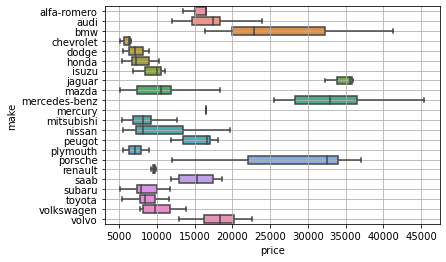

In [27]:
sns.boxplot(data=df, x="price", y="make")
plt.grid(True)

# Label Encoding

In [28]:
df.head()

,symboling,normalized-losses,make,fuel-type,body-style,drive-wheels,engine-location,width,height,engine-type,engine-size,horsepower,city-mpg,highway-mpg,price
0,3,122.0,alfa-romero,gas,convertible,rwd,front,64.1,48.8,dohc,130,111.0,21,27,13495
1,3,122.0,alfa-romero,gas,convertible,rwd,front,64.1,48.8,dohc,130,111.0,21,27,16500
2,1,122.0,alfa-romero,gas,hatchback,rwd,front,65.5,52.4,ohcv,152,154.0,19,26,16500
3,2,164.0,audi,gas,sedan,fwd,front,66.2,54.3,ohc,109,102.0,24,30,13950
4,2,164.0,audi,gas,sedan,4wd,front,66.4,54.3,ohc,136,115.0,18,22,17450


In [29]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 194 entries, 0 to 204
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   symboling          194 non-null    int64  
 1   normalized-losses  194 non-null    float64
 2   make               194 non-null    object 
 3   fuel-type          194 non-null    object 
 4   body-style         194 non-null    object 
 5   drive-wheels       194 non-null    object 
 6   engine-location    194 non-null    object 
 7   width              194 non-null    float64
 8   height             194 non-null    float64
 9   engine-type        194 non-null    object 
 10  engine-size        194 non-null    int64  
 11  horsepower         194 non-null    float64
 12  city-mpg           194 non-null    int64  
 13  highway-mpg        194 non-null    int64  
 14  price              194 non-null    int64  
dtypes: float64(4), int64(5), object(6)
memory usage: 28.3+ KB


In [30]:
#dividing the dataset into two parts i.e, df_cat(catagorical), df_num(numerical)

In [31]:
df_cat = df.select_dtypes(object)
df_num = df.select_dtypes(["float64", "int64"])

In [32]:
df_cat

,make,fuel-type,body-style,drive-wheels,engine-location,engine-type
0,alfa-romero,gas,convertible,rwd,front,dohc
1,alfa-romero,gas,convertible,rwd,front,dohc
2,alfa-romero,gas,hatchback,rwd,front,ohcv
3,audi,gas,sedan,fwd,front,ohc
4,audi,gas,sedan,4wd,front,ohc
...,...,...,...,...,...,...
200,volvo,gas,sedan,rwd,front,ohc
201,volvo,gas,sedan,rwd,front,ohc
202,volvo,gas,sedan,rwd,front,ohcv
203,volvo,diesel,sedan,rwd,front,ohc


In [33]:
df_num

,symboling,normalized-losses,width,height,engine-size,horsepower,city-mpg,highway-mpg,price
0,3,122.0,64.1,48.8,130,111.0,21,27,13495
1,3,122.0,64.1,48.8,130,111.0,21,27,16500
2,1,122.0,65.5,52.4,152,154.0,19,26,16500
3,2,164.0,66.2,54.3,109,102.0,24,30,13950
4,2,164.0,66.4,54.3,136,115.0,18,22,17450
...,...,...,...,...,...,...,...,...,...
200,-1,95.0,68.9,55.5,141,114.0,23,28,16845
201,-1,95.0,68.8,55.5,141,160.0,19,25,19045
202,-1,95.0,68.9,55.5,173,134.0,18,23,21485
203,-1,95.0,68.9,55.5,145,106.0,26,27,22470


In [34]:
df_cat["fuel-type"].value_counts()

gas       174
diesel     20
Name: fuel-type, dtype: int64

In [35]:
df_cat["fuel-type"].value_counts

<bound method IndexOpsMixin.value_counts of 0         gas
1         gas
2         gas
3         gas
4         gas
        ...  
200       gas
201       gas
202       gas
203    diesel
204       gas
Name: fuel-type, Length: 194, dtype: object>

In [36]:
pd.get_dummies(df_cat["fuel-type"])

,diesel,gas
0,0,1
1,0,1
2,0,1
3,0,1
4,0,1
...,...,...
200,0,1
201,0,1
202,0,1
203,1,0


In [37]:
df["make"].nunique()

22

In [38]:
#now by using LabelEncoder we change the df_cat dataset from catagricat to numerical form

In [39]:
from sklearn.preprocessing import LabelEncoder

In [40]:
#first we chage the (fuel-type) data into numerical form

In [41]:
le = LabelEncoder()
le.fit_transform(df_cat["fuel-type"])

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0,
       0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0,
       1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1,
       0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1])

In [42]:
#by using for loop now we change the whole dataset into numerical form

In [43]:
for col in df_cat:
    le = LabelEncoder()
    df_cat[col] = le.fit_transform(df_cat[col])

In [44]:
df_cat

,make,fuel-type,body-style,drive-wheels,engine-location,engine-type
0,0,1,0,2,0,0
1,0,1,0,2,0,0
2,0,1,2,2,0,5
3,1,1,3,1,0,3
4,1,1,3,0,0,3
...,...,...,...,...,...,...
200,21,1,3,2,0,3
201,21,1,3,2,0,3
202,21,1,3,2,0,5
203,21,0,3,2,0,3


In [45]:
df = pd.concat([df_cat, df_num],axis=1)

In [46]:
df.head()

,make,fuel-type,body-style,drive-wheels,engine-location,engine-type,symboling,normalized-losses,width,height,engine-size,horsepower,city-mpg,highway-mpg,price
0,0,1,0,2,0,0,3,122.0,64.1,48.8,130,111.0,21,27,13495
1,0,1,0,2,0,0,3,122.0,64.1,48.8,130,111.0,21,27,16500
2,0,1,2,2,0,5,1,122.0,65.5,52.4,152,154.0,19,26,16500
3,1,1,3,1,0,3,2,164.0,66.2,54.3,109,102.0,24,30,13950
4,1,1,3,0,0,3,2,164.0,66.4,54.3,136,115.0,18,22,17450


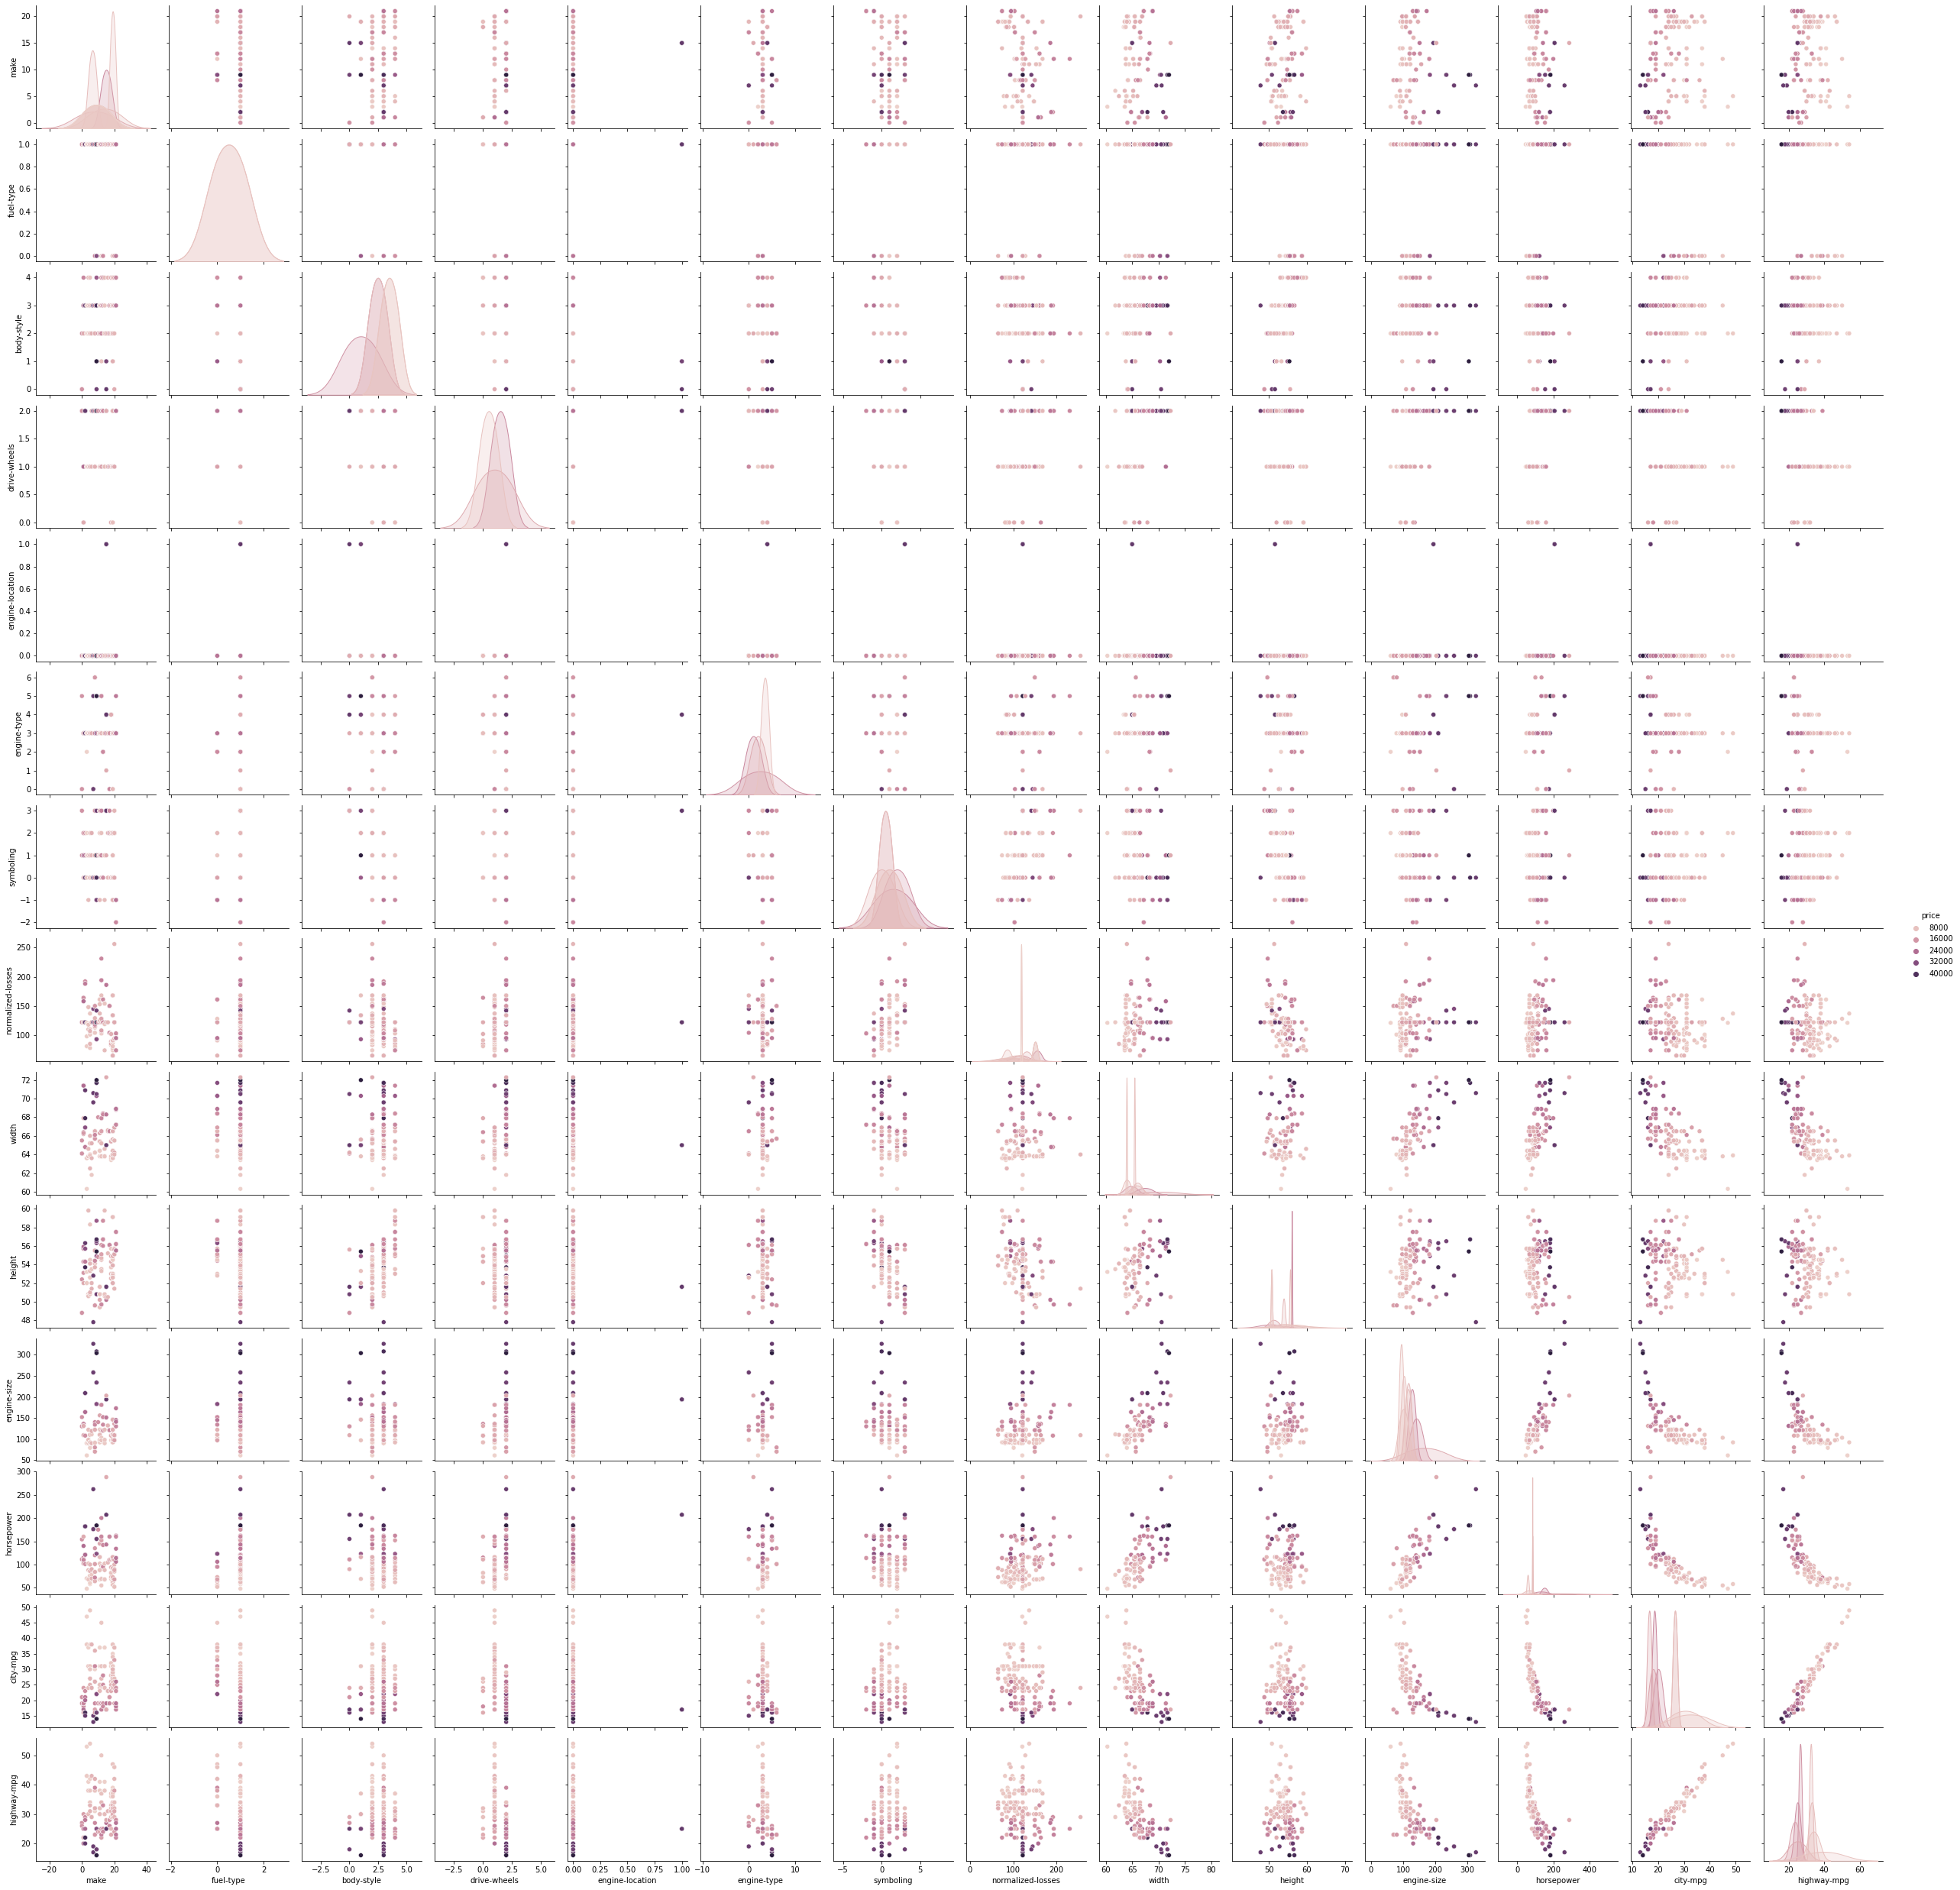

In [47]:
sns.pairplot(data=df, hue="price")

# Creating the model

In [48]:
x = df.iloc[:,:-1]
y = df.iloc[:,-1]

In [49]:
x

,make,fuel-type,body-style,drive-wheels,engine-location,engine-type,symboling,normalized-losses,width,height,engine-size,horsepower,city-mpg,highway-mpg
0,0,1,0,2,0,0,3,122.0,64.1,48.8,130,111.0,21,27
1,0,1,0,2,0,0,3,122.0,64.1,48.8,130,111.0,21,27
2,0,1,2,2,0,5,1,122.0,65.5,52.4,152,154.0,19,26
3,1,1,3,1,0,3,2,164.0,66.2,54.3,109,102.0,24,30
4,1,1,3,0,0,3,2,164.0,66.4,54.3,136,115.0,18,22
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,21,1,3,2,0,3,-1,95.0,68.9,55.5,141,114.0,23,28
201,21,1,3,2,0,3,-1,95.0,68.8,55.5,141,160.0,19,25
202,21,1,3,2,0,5,-1,95.0,68.9,55.5,173,134.0,18,23
203,21,0,3,2,0,3,-1,95.0,68.9,55.5,145,106.0,26,27


In [50]:
y

0      13495
1      16500
2      16500
3      13950
4      17450
       ...  
200    16845
201    19045
202    21485
203    22470
204    22625
Name: price, Length: 194, dtype: int64

In [51]:
from scipy.stats import skew

In [52]:
df_num

,symboling,normalized-losses,width,height,engine-size,horsepower,city-mpg,highway-mpg,price
0,3,122.0,64.1,48.8,130,111.0,21,27,13495
1,3,122.0,64.1,48.8,130,111.0,21,27,16500
2,1,122.0,65.5,52.4,152,154.0,19,26,16500
3,2,164.0,66.2,54.3,109,102.0,24,30,13950
4,2,164.0,66.4,54.3,136,115.0,18,22,17450
...,...,...,...,...,...,...,...,...,...
200,-1,95.0,68.9,55.5,141,114.0,23,28,16845
201,-1,95.0,68.8,55.5,141,160.0,19,25,19045
202,-1,95.0,68.9,55.5,173,134.0,18,23,21485
203,-1,95.0,68.9,55.5,145,106.0,26,27,22470


symboling
0.21386866184357742


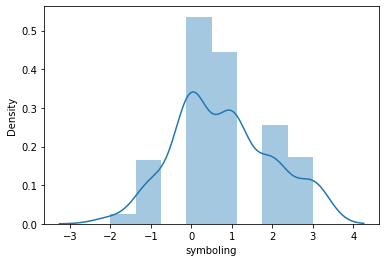

normalized-losses
0.848205953606264


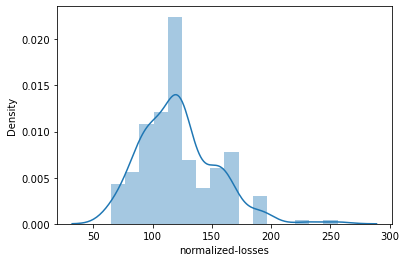

width
0.9140400320504322


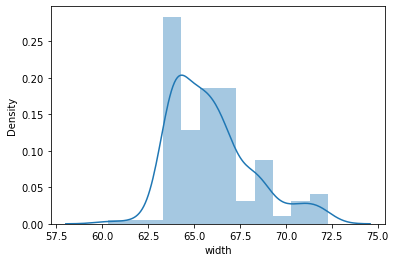

height
0.013839962443639326


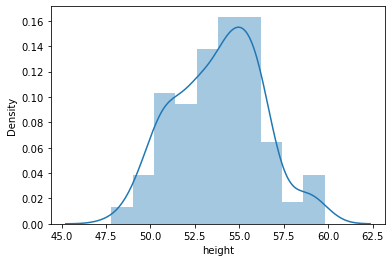

engine-size
2.0541257626466156


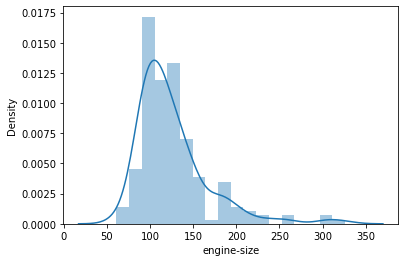

horsepower
1.5556576549504106


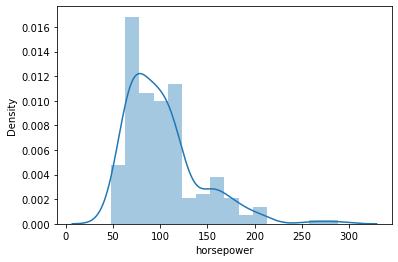

city-mpg
0.5999073033714895


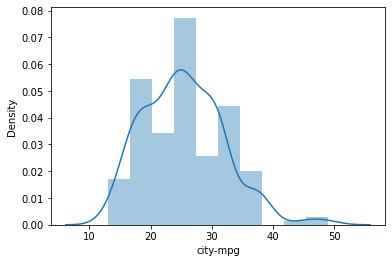

highway-mpg
0.4760310091695327


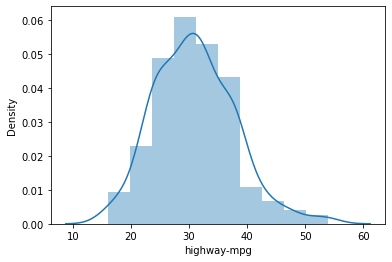

price
1.8166794702973463


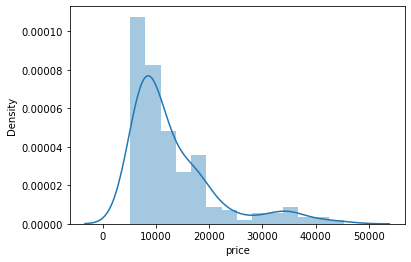

In [53]:
for col in df_num:
    print(col)
    print(skew( df_num[col] ))
    
    plt.figure()
    sns.distplot(df_num[col])
    plt.show()

In [54]:
df.corr()

,make,fuel-type,body-style,drive-wheels,engine-location,engine-type,symboling,normalized-losses,width,height,engine-size,horsepower,city-mpg,highway-mpg,price
make,1.000000,-0.119746,0.109203,-0.052044,0.057249,0.010788,-0.133413,-0.292370,-0.013582,0.243751,-0.100960,-0.087388,0.079432,0.075333,-0.173792
fuel-type,-0.119746,1.000000,-0.146577,-0.143825,0.042490,0.112181,0.194923,0.099052,-0.238744,-0.279480,-0.081435,0.155486,-0.253782,-0.185979,-0.115791
body-style,0.109203,-0.146577,1.000000,-0.149962,-0.291270,-0.033920,-0.584658,-0.238410,0.145147,0.574268,-0.057853,-0.143735,0.015181,-0.024926,-0.065831
drive-wheels,-0.052044,-0.143825,-0.149962,1.000000,0.154729,-0.053643,-0.055088,0.303588,0.470463,-0.016925,0.518208,0.511362,-0.448046,-0.450402,0.584485
engine-location,0.057249,0.042490,-0.291270,0.154729,1.000000,0.116897,0.231375,0.002392,-0.051210,-0.114057,0.204366,0.334271,-0.161467,-0.109265,0.333620
engine-type,0.010788,0.112181,-0.033920,-0.053643,0.116897,1.000000,0.070345,-0.035104,0.048240,-0.162899,0.109809,0.101747,-0.152574,-0.152407,0.102758
symboling,-0.133413,0.194923,-0.584658,-0.055088,0.231375,0.070345,1.000000,0.447922,-0.272388,-0.521495,-0.153671,0.027074,0.007189,0.084238,-0.095905
normalized-losses,-0.292370,0.099052,-0.238410,0.303588,0.002392,-0.035104,0.447922,1.000000,0.066622,-0.368540,0.090258,0.183385,-0.212276,-0.168904,0.129973
width,-0.013582,-0.238744,0.145147,0.470463,-0.051210,0.048240,-0.272388,0.066622,1.000000,0.296011,0.735112,0.643906,-0.641401,-0.677911,0.730503
height,0.243751,-0.279480,0.574268,-0.016925,-0.114057,-0.162899,-0.521495,-0.368540,0.296011,1.000000,0.096041,-0.078245,-0.078815,-0.142926,0.147010


<AxesSubplot:>

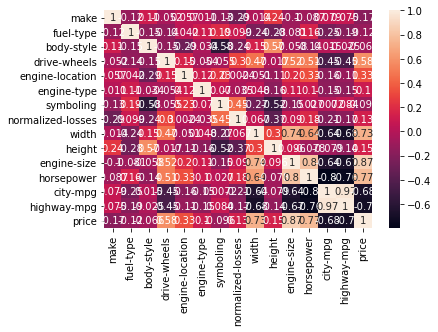

In [55]:
sns.heatmap(df.corr(), annot=True)

In [56]:
np.log(-3)

nan

In [57]:
np.sqrt(-3)

nan

In [58]:
df_num["normalized-losses"] =np.sqrt(df_num["normalized-losses"])

In [59]:
skew(df_num["normalized-losses"])

0.4136415061835428

In [60]:
from sklearn.model_selection import train_test_split, cross_val_score
xtrain, xtest, ytrain, ytest = train_test_split(x,y, test_size = 0.3, random_state=0)

In [61]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR 

In [97]:
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

In [98]:
def mymodel(model):
    model.fit(xtrain, ytrain)
    ypred = model.predict(xtest)
    ac = (r2_score(ytest, ypred))
    mse = mean_squared_error(ytest, ypred)
    mae = mean_absolute_error(ytest, ypred)
    rmse = np.sqrt(mse)
    print(f"Accuracy :- {ac}/n/nMSE :- {mse}/n/nRMSE :- {rmse}/n/nMAE :- {mae}")

In [99]:
models = []

models.append(("Linreg        -: ", LinearRegression()))
models.append(("KNN           -: ", KNeighborsRegressor()))
models.append(("SVM-l         -: ", SVR(kernel="linear")))
models.append(("SVM-r         -: ", SVR(kernel="rbf")))


for name, model in models:
    print(name)
    mymodel(model)
    print("\n\n")

Linreg        -: 
Accuracy :- 0.7872533647503879/n/nMSE :- 14568791.32741768/n/nRMSE :- 3816.9086087326846/n/nMAE :- 2568.578977315566



KNN           -: 
Accuracy :- 0.7266971249115963/n/nMSE :- 18715654.664406776/n/nRMSE :- 4326.159343390715/n/nMAE :- 2604.9016949152538



SVM-l         -: 
Accuracy :- 0.7187520141543107/n/nMSE :- 19259732.179711815/n/nRMSE :- 4388.591138362267/n/nMAE :- 2587.2902509163678



SVM-r         -: 
Accuracy :- -0.17748516694338834/n/nMSE :- 80633640.42491509/n/nRMSE :- 8979.623623789312/n/nMAE :- 5394.447269864856





In [100]:
linreg = LinearRegression()
linreg.fit(xtrain, ytrain)
ypred = linreg.predict(xtest)

In [101]:
train = linreg.score(xtrain, ytrain)
test =  r2_score(ytest, ypred)

print(f"Training Result -: {train}")
print(f"Test Result     -: {test}")

Training Result -: 0.8746947367858329
Test Result     -: 0.7872533647503879


In [102]:
linreg.coef_

array([-1.88388809e+02, -1.35614579e+03,  9.60396622e+01,  2.31554489e+03,
        1.07132919e+04,  8.96539296e+01,  2.81435900e+02, -1.51192911e+01,
        8.88448341e+02,  2.20890197e+02,  7.49622351e+01,  4.11780705e+01,
       -4.89978638e+00, -3.18332548e+01])

In [103]:
from sklearn.linear_model import Ridge, Lasso

In [104]:
#Ridge

In [105]:
l2 = Ridge(alpha=10)

In [106]:
l2.fit(xtrain, ytrain)
ypred = l2.predict(xtest)

In [107]:
print(r2_score(ytest, ypred))

0.7446755037448582


In [108]:
l2.coef_

array([-162.36497185, -996.82774462, -220.92859501, 1845.47528303,
       1300.29035686,  112.887593  ,  356.37816602,  -13.80861823,
        680.56398422,  347.44073799,   79.53038111,   63.28044251,
          2.62673725,    4.73681121])

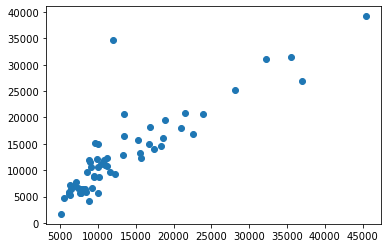

In [109]:
plt.scatter(ytest, ypred)

In [110]:
#Lasso

In [111]:
l1 = Lasso(alpha=10)

In [112]:
l1.fit(xtrain, ytrain)
ypred = l1.predict(xtest)

In [113]:
print(r2_score(ytest, ypred))

0.7845447689773163


In [114]:
l1.coef_

array([-1.84907763e+02, -1.28035315e+03,  2.37417559e+01,  2.27849945e+03,
        9.72464957e+03,  8.61808657e+01,  2.68105178e+02, -1.47775973e+01,
        8.65335349e+02,  2.36756798e+02,  7.54992815e+01,  4.34037541e+01,
       -2.99077374e+00, -2.81059070e+01])

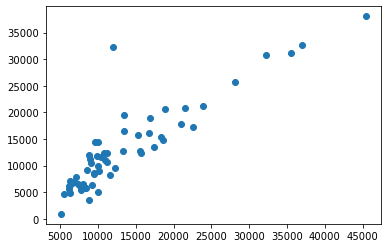

In [115]:
plt.scatter(ytest, ypred)

In [116]:
for i in range(100):
    l2 = Ridge(alpha=i)
    l2.fit(xtrain, ytrain)
    print(f"{i} -: {l2.score(xtest, ytest)}")

0 -: 0.7872533647503897
1 -: 0.767302806500241
2 -: 0.7582177046817948
3 -: 0.7533125714156794
4 -: 0.7503556031941556
5 -: 0.7484405699868022
6 -: 0.7471368782034529
7 -: 0.7462162055202609
8 -: 0.7455474945883274
9 -: 0.7450509055949546
10 -: 0.7446755037448582
11 -: 0.7443875782337195
12 -: 0.7441641395087408
13 -: 0.7439891142571227
14 -: 0.7438510254378199
15 -: 0.7437415281634403
16 -: 0.7436544582832081
17 -: 0.743585198420644
18 -: 0.7435302462564803
19 -: 0.7434869148951573
20 -: 0.7434531213913576
21 -: 0.7434272352621618
22 -: 0.7434079685186195
23 -: 0.7433942948783849
24 -: 0.7433853897719231
25 -: 0.743380585351132
26 -: 0.7433793364450809
27 -: 0.7433811945865134
28 -: 0.7433857880449168
29 -: 0.7433928063688346
30 -: 0.743401988340527
31 -: 0.7434131125320974
32 -: 0.7434259898585334
33 -: 0.7434404576734668
34 -: 0.7434563750638734
35 -: 0.743473619081783
36 -: 0.743492081712139
37 -: 0.7435116674218893
38 -: 0.7435322911701185
39 -: 0.7435538767855336
40 -: 0.74357635

In [117]:
l2 = Ridge(alpha=0)
l2.fit(xtrain, ytrain)
ypred = l2.predict(xtest)

print(r2_score(ytest, ypred))

0.7872533647503897


In [118]:
for i in range(0,1000,50):
    l1 = Lasso(alpha=i)
    l1.fit(xtrain, ytrain)
    print(f"{i} -: {l1.score(xtest, ytest)}")

0 -: 0.78725336475039
50 -: 0.7659283362102931
100 -: 0.7397789106535343
150 -: 0.7312865128312395
200 -: 0.7333720072320571
250 -: 0.7330361793350894
300 -: 0.7321466777653632
350 -: 0.731729076002716
400 -: 0.731674552125494
450 -: 0.7324943095892767
500 -: 0.7322486638458842
550 -: 0.7325708026281421
600 -: 0.73353993479164
650 -: 0.7344494557905592
700 -: 0.735304724500026
750 -: 0.7361072960479971
800 -: 0.7368479400706667
850 -: 0.7375354588157039
900 -: 0.738165257991201
950 -: 0.7387387724658839


In [119]:
l1 = Lasso(alpha=0)
l1.fit(xtrain, ytrain)
ypred = l1.predict(xtest)
print(r2_score(ytest, ypred))

0.78725336475039


# Cross Validation

In [123]:
cvs = cross_val_score(l1, x,y, cv=4)

In [124]:
cvs

array([0.75135279, 0.8578691 , 0.37303229, 0.38158495])

In [125]:
cvs.mean()

0.5909597821083946